 Original Mean: 60.56
 Bootstrap Mean: 60.49
 Bootstrap Std Dev: 2.05
 95% Confidence Interval: [56.60578125 64.5825    ]


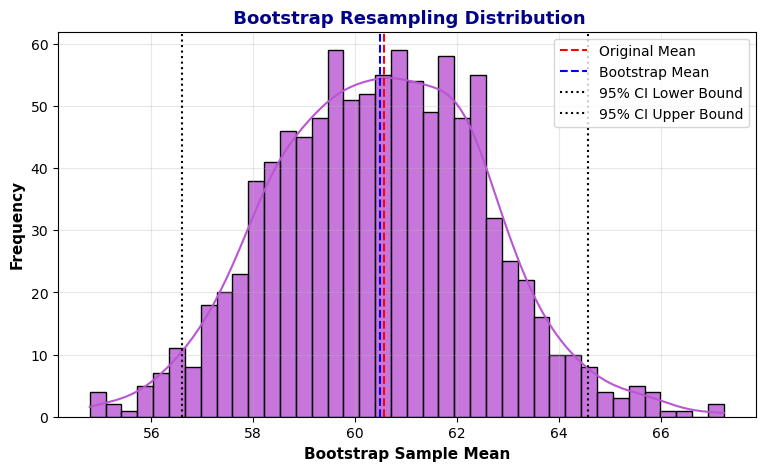

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = "Mall_Customers.csv"
df = pd.read_csv(file_path)
feature = "Annual Income (k$)"
data = df[feature].dropna().values
n_iterations = 1000  
sample_size = max(30, int(0.8 * len(data)))  
bootstrap_means = [] 
np.random.seed(42)  
for _ in range(n_iterations):
    sample = np.random.choice(data, size=sample_size, replace=True)
    bootstrap_means.append(np.mean(sample))
bootstrap_df = pd.DataFrame({"Bootstrap Mean": bootstrap_means})
orig_mean = np.mean(data)
boot_mean = np.mean(bootstrap_means)
boot_std = np.std(bootstrap_means)
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])
print(f" Original Mean: {orig_mean:.2f}")
print(f" Bootstrap Mean: {boot_mean:.2f}")
print(f" Bootstrap Std Dev: {boot_std:.2f}")
print(f" 95% Confidence Interval: {confidence_interval}")

plt.figure(figsize=(9, 5))
sns.histplot(bootstrap_means, bins=40, kde=True, color="mediumorchid", alpha=0.8)
plt.axvline(orig_mean, color="red", linestyle="dashed", label="Original Mean")
plt.axvline(boot_mean, color="blue", linestyle="dashed", label="Bootstrap Mean")
plt.axvline(confidence_interval[0], color="black", linestyle="dotted", label="95% CI Lower Bound")
plt.axvline(confidence_interval[1], color="black", linestyle="dotted", label="95% CI Upper Bound")

plt.xlabel("Bootstrap Sample Mean", fontsize=11, fontweight="bold", color="black")
plt.ylabel("Frequency", fontsize=11, fontweight="bold", color="black")
plt.title(" Bootstrap Resampling Distribution", fontsize=13, fontweight="bold", color="darkblue")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
